In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from pandas import read_excel
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import cluster
import seaborn as sns
from scipy import stats

# Read the data with the features

In [2]:
dfclient_feat=pd.read_csv('outlierscheck4fromubuntu.csv',sep=",")
#dfclient_feat.head()
dfclient_feat.columns

Index(['client_username_s', 'countt', 'recency', 'frequency', 'max_dist',
       'average_trans_dur', 'diff_maxd_mind_days', 'start_trans_end_data'],
      dtype='object')

In [3]:
dfclient_feat=dfclient_feat.dropna()
dfclient_feat.head()

,client_username_s,countt,recency,frequency,max_dist,average_trans_dur,diff_maxd_mind_days,start_trans_end_data
0,-3076708436585629202,38,168,9,61,33.78,304,472
1,-1383360085895621481,2687,1,106,6,1.35,143,144
2,-4373917140025030743,349,7,24,71,11.17,268,275
3,-1932624376972617513,16,17,14,118,38.71,542,559
4,8138114728915753073,2250,13,113,27,5.23,591,604


In [4]:
#number of clients
len(dfclient_feat)

1858803

In [5]:
dfclient_feat.dtypes

client_username_s         int64
countt                    int64
recency                   int64
frequency                 int64
max_dist                  int64
average_trans_dur       float64
diff_maxd_mind_days       int64
start_trans_end_data      int64
dtype: object

# The clients are 1.858.803

Take only the features

In [7]:
noclient=dfclient_feat.loc[:,'countt':]
noclient.head()

,countt,recency,frequency,max_dist,average_trans_dur,diff_maxd_mind_days,start_trans_end_data
0,38,168,9,61,33.78,304,472
1,2687,1,106,6,1.35,143,144
2,349,7,24,71,11.17,268,275
3,16,17,14,118,38.71,542,559
4,2250,13,113,27,5.23,591,604


# Checking for Outliers

## 1st approach :Discover outliers with visualization tools

##### Box plot-




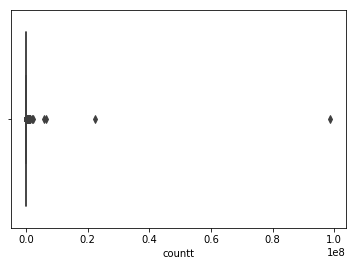

In [8]:
sns.boxplot(x=noclient['countt'])

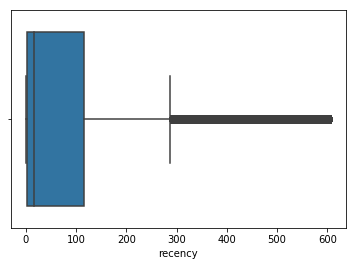

In [9]:
sns.boxplot(x=noclient['recency'])

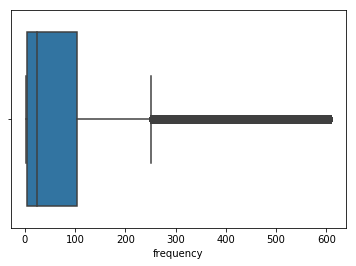

In [10]:
sns.boxplot(x=noclient['frequency'])

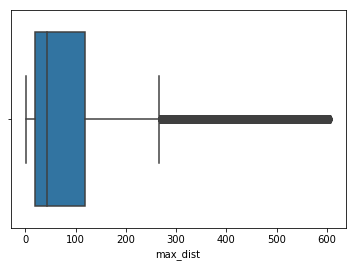

In [11]:
sns.boxplot(x=noclient['max_dist'])

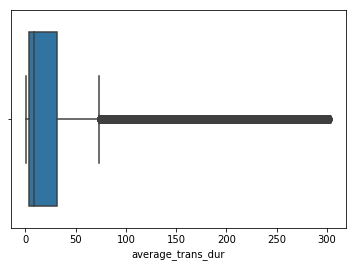

In [12]:
sns.boxplot(x=noclient['average_trans_dur'])

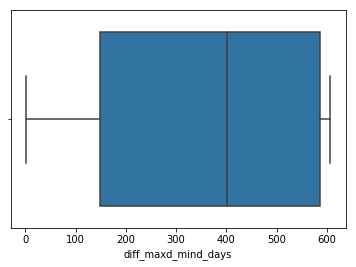

In [13]:
sns.boxplot(x=noclient['diff_maxd_mind_days'])

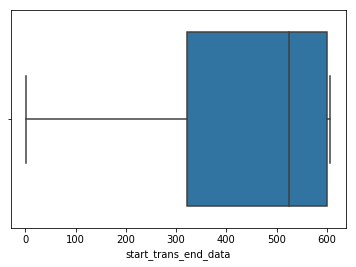

In [14]:
sns.boxplot(x=noclient['start_trans_end_data'])

### Set the column client_username_s as index so as to keep the matches after removing the outliers

In [15]:
dfclient_feat=dfclient_feat.set_index('client_username_s')

In [16]:
dfclient_feat

,countt,recency,frequency,max_dist,average_trans_dur,diff_maxd_mind_days,start_trans_end_data
client_username_s,,,,,,,
-3076708436585629202,38,168,9,61,33.78,304,472
-1383360085895621481,2687,1,106,6,1.35,143,144
-4373917140025030743,349,7,24,71,11.17,268,275
-1932624376972617513,16,17,14,118,38.71,542,559
8138114728915753073,2250,13,113,27,5.23,591,604
3238105438798080237,1095,0,94,31,6.40,602,602
6715359518456271901,1073,10,25,24,10.64,266,276
-5699689628182849411,3136,2,225,22,1.96,440,442
3738582637858980585,1736,18,73,28,1.96,143,161


## 2nd approach IQR score

In [17]:
#  IQR score
Q1 = dfclient_feat.quantile(0.25)
Q3 = dfclient_feat.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


countt                  1872.00
recency                  114.00
frequency                 99.00
max_dist                  99.00
average_trans_dur         27.75
diff_maxd_mind_days      438.00
start_trans_end_data     280.00
dtype: float64


In [18]:
print(dfclient_feat < (Q1 - 1.5 * IQR)) or (dfclient_feat > (Q3 + 1.5 * IQR))


                      countt  recency  frequency  max_dist  average_trans_dur  \
client_username_s                                                               
-3076708436585629202   False    False      False     False              False   
-1383360085895621481   False    False      False     False              False   
-4373917140025030743   False    False      False     False              False   
-1932624376972617513   False    False      False     False              False   
 8138114728915753073   False    False      False     False              False   
 3238105438798080237   False    False      False     False              False   
 6715359518456271901   False    False      False     False              False   
-5699689628182849411   False    False      False     False              False   
 3738582637858980585   False    False      False     False              False   
 1928064594810315272   False    False      False     False              False   
-8064344582484646647   False

,countt,recency,frequency,max_dist,average_trans_dur,diff_maxd_mind_days,start_trans_end_data
client_username_s,,,,,,,
-3076708436585629202,False,False,False,False,False,False,False
-1383360085895621481,False,False,False,False,False,False,False
-4373917140025030743,False,False,False,False,False,False,False
-1932624376972617513,False,False,False,False,False,False,False
8138114728915753073,False,False,False,False,False,False,False
3238105438798080237,False,False,False,False,False,False,False
6715359518456271901,False,False,False,False,False,False,False
-5699689628182849411,False,False,False,False,False,False,False
3738582637858980585,False,False,False,False,False,False,False


In [19]:
#new data frame without outliers
dfclient_feat_out = dfclient_feat[~((dfclient_feat < (Q1 - 1.5 * IQR)) |(dfclient_feat > (Q3 + 1.5 * IQR))).any(axis=1)]


# Number of rows and number of features of the pandas df

In [20]:
dfclient_feat_out.shape

(1218752, 7)

# Export to csv 

In [22]:
#export
dfclient_feat_out.to_csv('dfclient_feat_out4.csv')

# 2nd part     

## Correlation between variables- features

In [23]:
c=pd.DataFrame(dfclient_feat_out.columns)

In [24]:
df=pd.DataFrame(corrcoef([dfclient_feat_out.countt,dfclient_feat_out.recency,dfclient_feat_out.frequency,dfclient_feat_out.max_dist,dfclient_feat_out.average_trans_dur,dfclient_feat_out.diff_maxd_mind_days,dfclient_feat_out.start_trans_end_data]))


In [25]:
anw=pd.DataFrame(np.triu(df))
for i in range(7):
    for j in range(7):
            anw=anw.replace(0,'')
corrtable=pd.concat([c, anw], axis=1, ignore_index=True)
corrtable.columns = ['variables','countt', 'recency', 'frequency', 'max_dist', 'average_trans_dur','diff_maxd_mind_days', 
                     'start_trans_end_data']
corrtable=corrtable.set_index('variables')
corrtable

,countt,recency,frequency,max_dist,average_trans_dur,diff_maxd_mind_days,start_trans_end_data
variables,,,,,,,
countt,1,-0.428353,0.893746,-0.34927,-0.486207,0.602515,0.511828
recency,,1,-0.42254,0.206427,0.380254,-0.427964,-0.119894
frequency,,,1,-0.348456,-0.514037,0.612385,0.524705
max_dist,,,,1,0.714158,0.155134,0.242702
average_trans_dur,,,,,1,-0.122274,-0.001145
diff_maxd_mind_days,,,,,,1,0.948587
start_trans_end_data,,,,,,,1.000000




Correlation between variables of the dataset :


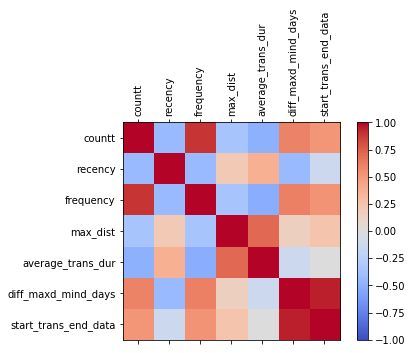

In [26]:
#correlation matrix for features 
corr = dfclient_feat_out.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(noclient.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(noclient.columns)
ax.set_yticklabels(noclient.columns)
print('\n')
print('Correlation between variables of the dataset :')

plt.show()

 Comments for correlation
### 0.9 < corr <1.0    ------> very high correlation. 
(diff_maxd_mind_days-start_trans_end_data)
### 0.7 < corr < 0.9   ------> high correlation.         
(countt - frequency) , (max_dist-average_trans_dur)
### 0.5 < corr < 0.7   ------> moderate correlation.   

### 0.3 < corr < 0.5   ------> low correlation. 

###          corr < 0.3  -------> little-any (linear) correlation


# 3rd part   -Visualization of clusters

## Visualization of the clusters  -I will use PCA

### Read the data from ubuntu

In [3]:
#Read the log data
pred1dok3=pd.read_csv('pd_pred1dok3fromubuntu.csv',sep=",")
pred2dok3=pd.read_csv('pd_pred2dok3fromubuntu.csv',sep=",")
#pred3dok3=pd.read_csv('pd_pred3dok3fromubuntu.csv',sep=",")
#pred4dok3=pd.read_csv('pd_pred4dok3fromubuntu.csv',sep=",")

In [4]:
#Take the columns I want
feat_cols=['countt','recency','frequency','max_dist','average_trans_dur','diff_maxd_mind_days','start_trans_end_data']

# approach 2

In [5]:
scaler = StandardScaler()

In [6]:
std_data=scaler.fit(pred2dok3[feat_cols])

In [7]:
std_datatr=scaler.transform(pred2dok3[feat_cols])

In [8]:
# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(std_datatr)
pred2dok3['pca-one'] = pca_result[:,0]
pred2dok3['pca-two'] = pca_result[:,1] 
pred2dok3['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.50450346 0.28098861 0.10850247]


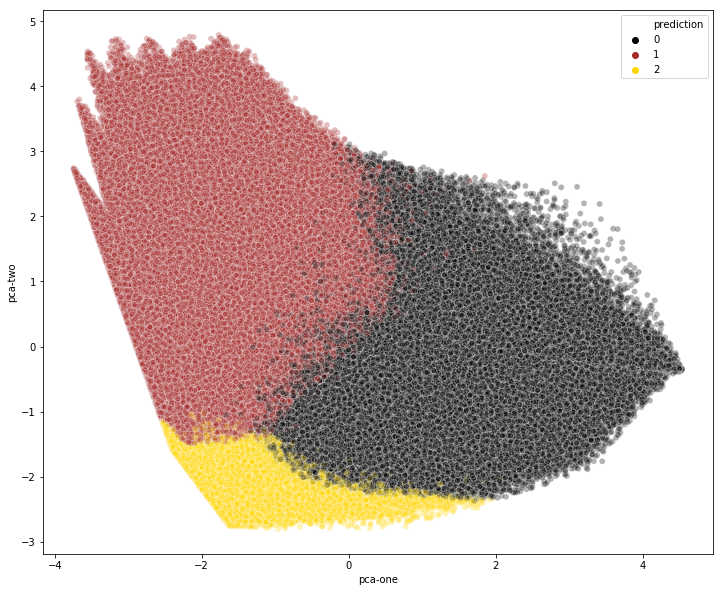

In [27]:
flatui=["black", "brown", "gold"]
plt.figure(figsize=(12,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="prediction",
    palette=sns.color_palette(flatui),
    data=pred2dok3.loc[:,'prediction':],
    legend="full",
    alpha=0.3
)

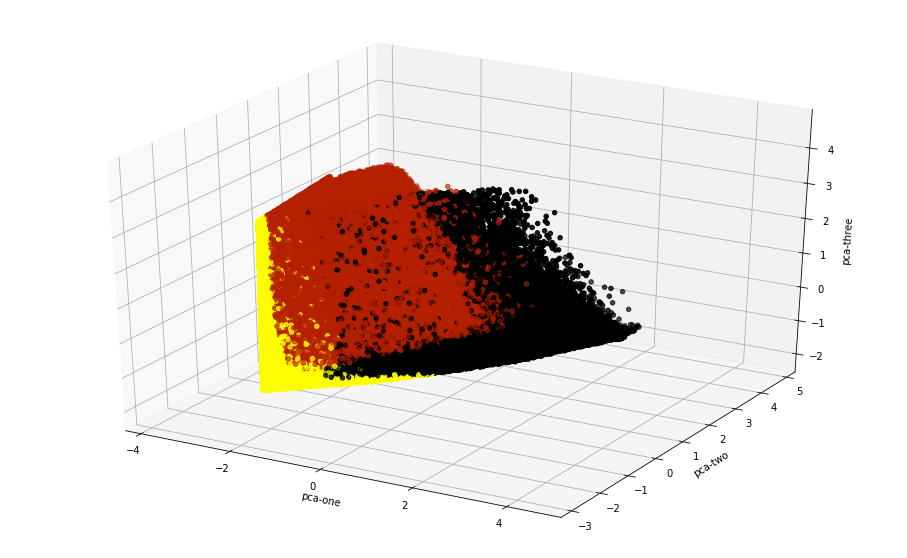

In [26]:
#3-D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pred2dok3.loc[:,'prediction':]["pca-one"], 
    ys=pred2dok3.loc[:,'prediction':]["pca-two"], 
    zs=pred2dok3.loc[:,'prediction':]["pca-three"], 
    c=pred2dok3.loc[:,'prediction':]["prediction"], 
    cmap='gnuplot'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## without standardisation approach 2

In [22]:
# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(pred2dok3[feat_cols].values)
pred2dok3['pca-one'] = pca_result[:,0]
pred2dok3['pca-two'] = pca_result[:,1] 
pred2dok3['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.95342005 0.04037318 0.00421664]


The first component gathering the most variation explains the 95% of the total variation 

##  2-D Plot

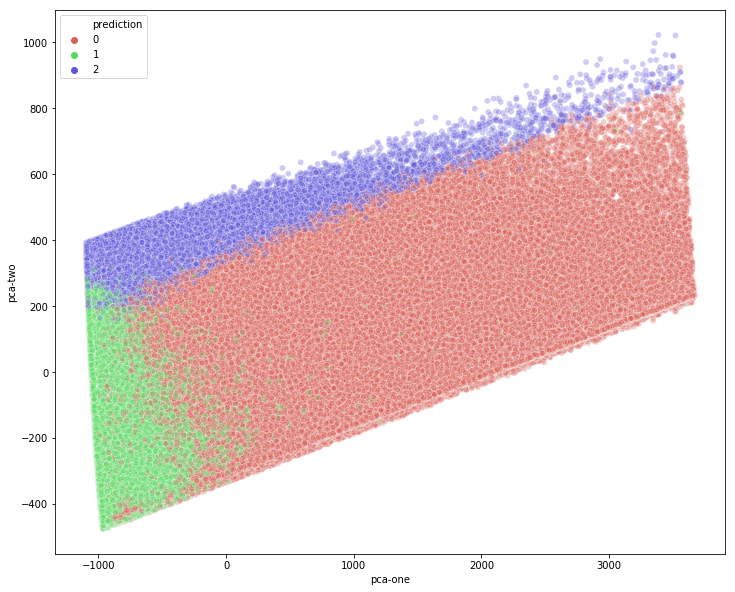

In [23]:
plt.figure(figsize=(12,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="prediction",
    palette=sns.color_palette("hls",3),
    data=pred2dok3.loc[:,'prediction':],
    legend="full",
    alpha=0.3
)

## 3-D plot

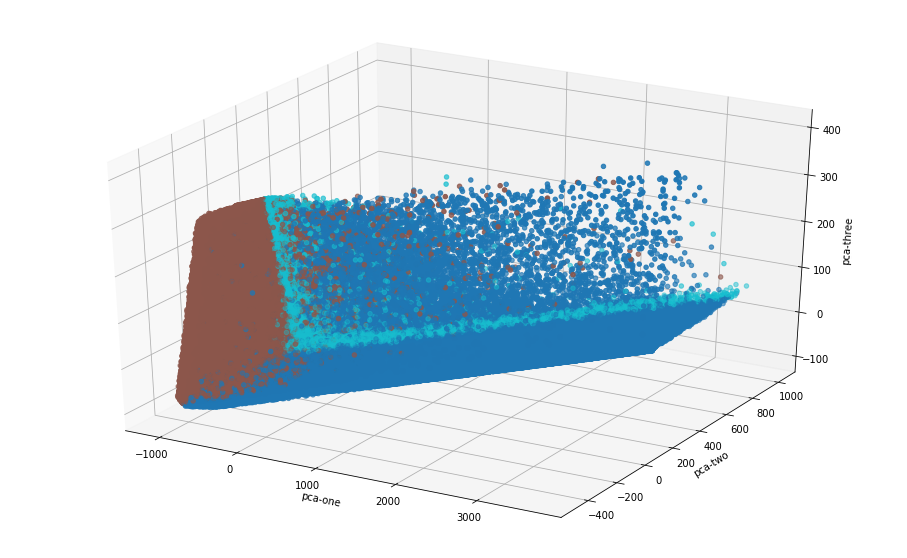

In [24]:
#3-D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pred2dok3.loc[:,'prediction':]["pca-one"], 
    ys=pred2dok3.loc[:,'prediction':]["pca-two"], 
    zs=pred2dok3.loc[:,'prediction':]["pca-three"], 
    c=pred2dok3.loc[:,'prediction':]["prediction"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## 1 dokimh

In [7]:
# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(pred1dok3[feat_cols].values)
pred1dok3['pca-one'] = pca_result[:,0]
pred1dok3['pca-two'] = pca_result[:,1] 
pred1dok3['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.95342005 0.04037318 0.00421664]


 The first component gathering the most variation explains the 95% of the total variation 

## 2-D Plot

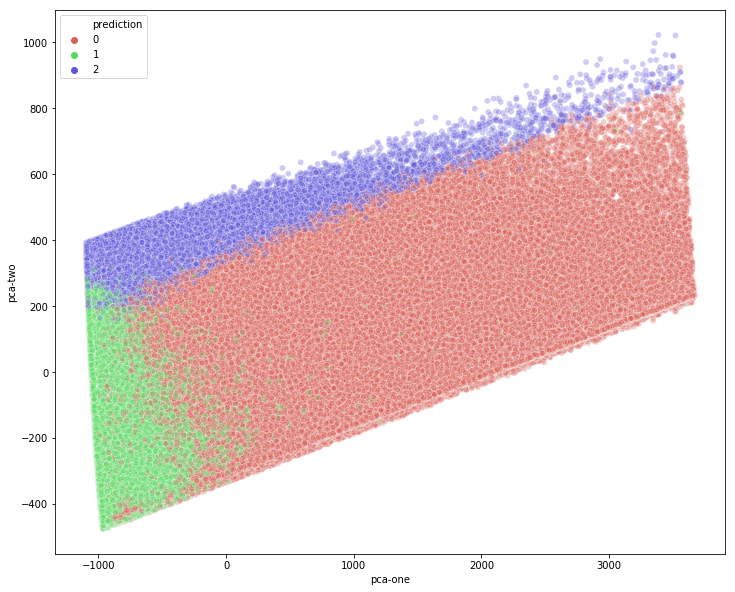

In [8]:
plt.figure(figsize=(12,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="prediction",
    palette=sns.color_palette("hls",3),
    data=pred1dok3.loc[:,'prediction':],
    legend="full",
    alpha=0.3
)

## 3-D Plot

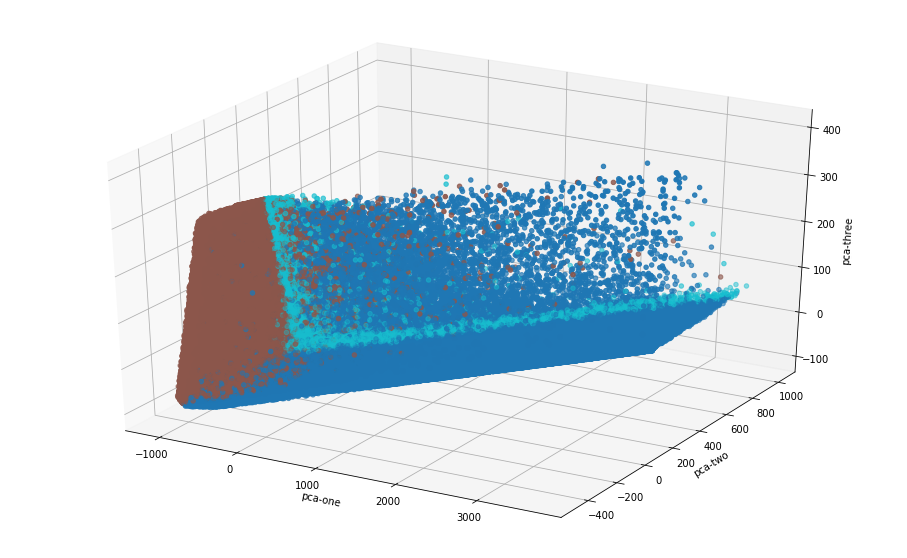

In [9]:
#3-D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pred1dok3.loc[:,'prediction':]["pca-one"], 
    ys=pred1dok3.loc[:,'prediction':]["pca-two"], 
    zs=pred1dok3.loc[:,'prediction':]["pca-three"], 
    c=pred1dok3.loc[:,'prediction':]["prediction"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### From all the above I think that the 2dok3 divided the data more uniform 